## Processamentos

### Pedro Henrique Arruda Faustini

Este trabalho procura reconhecer rostos de pessoas. Para tanto, existe um conjunto de faces, e por meio de aprendizado supervisionado, treina-se um modelo que se familiarize com elas. Então, fornce-se ao modelo faces ainda não vistas por ele para que ele diga quem é quem.

O código encontra-se nos arquivos .py dentro da pasta **face\_detector/**. 

**face\_detector/preprocessor.py** realiza operações de mais baixo nível, como ler imagens e identificar faces.

**face\_detector/person.py** contém a classe com os atributos que representam uma pessoa.

**face\_detector/utils.py** é uma classe com métodos diversos, como exibir uma imagem. Para acelerar o processamento, também contém os caminhos de todas as imagens em formato *hard coded*.

**face\_detector/model.py** é responsável por identificar quem é quem nas imagens.

Dentro da pasta *faces* há 26 pastas identificadas de A a X, uma para cada uma das 26 pessoas que compõem a base de dados. Dentro de cada uma dessas 26 pastas há imagens dessas pessoas.


#### Bibliotecas e versões

* opencv-python==3.4.3.18

* numpy==1.13.3

* matplotlib==1.5.3

* scikit-learn==0.19.1



In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image, HTML

from face_detector.preprocessor import Preprocessor
from face_detector.model import Model
from face_detector.utils import Utils

In [7]:
def imshow(img, colour=False):
    plt.axis('off')
    if colour == False:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #  OpenCV armazena em BGR, nao RGB
    plt.show()

In [8]:
p = Preprocessor()
u = Utils()
m = Model()

Primeiro as imagens são carregadas. Nelas, as pessoas estão em meio a um contexto, então é necessário identificar seu rosto e cortá-lo. Abaixo é mostrado um exemplo disso.

As imagens originalmente são coloridas. Contudo, ao serem carregadas, são convertidas para escala de cinza.

In [9]:
data = []
imgs = p.load_images() 

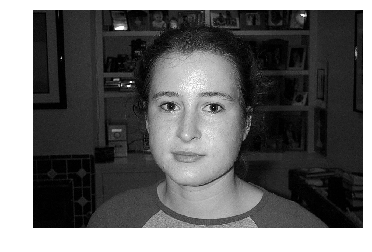

In [10]:
u.imshow(imgs[120][0])

O método *get_face* da classe *preprocessor* retorna um objeto *Person* que armazena informações de uma imagem. Entre essas informações está a imagem cortada de apenas a face de uma pessoa.

Ainda que possa distorcer um pouco as imagens, os rostos são reescalados para terem todos o mesmo tamanho (512x512 pixels). Além disso, o histograma de cada imagem é equalizado. Isso se mostrou eficiente, pois imagens com diferentes brilhos introduziam ruídos indesejados na classificação.

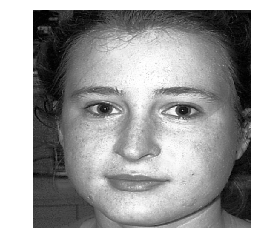

In [11]:
person = p.get_face(img=imgs[120][0], label=imgs[120][1])
u.imshow(person.face_resized)

Para a classificação, o procedimento acima é realizado para todas as imagens da base de dados. É criada uma lista de tuplas chamada *data*. Cada tupla contém (i) imagem do rosto de uma pessoa e (ii) a classe a que aquela imagem pertence. Cada pessoa diferente pertence a uma classe.

As imagens são então fornecidas a um modelo, que procura aprender as características de cada rosto. O modelo usa 70% da base para treinamento. Ele não tem acesso aos 30% restantes, que são usados como conjunto de teste, e deve classificar esses rostos conforme aquilo que aprendeu durante a etapa de treinamento.

In [12]:
for img in imgs:
    person = p.get_face(img=img[0], label=img[1])
    if person is not None:
        data.append((person.face_resized, person.label))
m.classify(data=data)

             precision    recall  f1-score   support

          A       1.00      0.75      0.86         4
          B       0.90      1.00      0.95         9
          C       1.00      1.00      1.00         2
          D       1.00      1.00      1.00         4
          E       1.00      1.00      1.00         7
          F       0.86      1.00      0.92         6
          G       1.00      1.00      1.00         8
          H       1.00      1.00      1.00         7
          I       1.00      1.00      1.00         2
          J       1.00      0.67      0.80         3
          K       1.00      1.00      1.00         7
          L       1.00      1.00      1.00         4
          M       1.00      1.00      1.00         7
          N       1.00      1.00      1.00         7
          O       1.00      1.00      1.00         1
          P       1.00      1.00      1.00         4
          Q       1.00      1.00      1.00         3
          R       1.00      1.00      1.00   

/home/pedro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 25, does not match size of target_names, 26
  .format(len(labels), len(target_names))
